In [1]:
using uMPS
using JLD2
using TensorOperations
using CairoMakie

In [7]:
dir = "example/heisenberg_s1_D30"

h0 = spinmodel(1,1,1;s = 1);
D = 30;
d = size(h0,1);

gs = load("$(dir)/gs.jld2")
e0 = gs["e0"]
# C=data(gs["gs"])[4]
# using LinearAlgebra
# svd(C)

-1.4014835391844058 + 0.0im

In [5]:
sx = [0 1. 0; 1. 0 1.0; 0 1. 0]/sqrt(2)
sy = [0 -1im 0; 1im 0 -1im; 0 1im 0]/sqrt(2)
sz = [1. 0 0; 0 0 0; 0 0 -1.0]
function compute_dsf_xyz_k(k, N = 200)
    println("load $dir/es$(N)_$(k)pi.jld2")

    f = load("$dir/es$(N)_$(k)pi.jld2")
    state = load("$dir/gs.jld2", "gs");
    Ek = f["Ek"]; X = f["X"]; VL = f["VL"]
    wx = dsf_all(sx, X, VL, state, k*pi)
    wy = dsf_all(sy, X, VL, state, k*pi)
    wz = dsf_all(sz, X, VL, state, k*pi)

    jldsave("$(dir)/dsf$(N)_$(k)pi.jld2"; wx = wx, wy = wy, wz = wz, Ek = Ek)
end
function get_dsf_k(k, N = 200; factor = 0.1, x_max = 8.0, b = "lor")
    dir_f = "$dir/dsf$(N)_$(k)pi.jld2"
    if !isfile(dir_f)
        println("compute $dir_f")
        compute_dsf_xyz_k(k, N)
    end
    println("load $dir_f")
    f = load(dir_f)
    wx = f["wx"]
    wy = f["wy"]
    wz = f["wz"]
    Ek = f["Ek"]
    ws = wx .+ wy .+ wz

    x, y = broadening(real(Ek), abs2.(ws), factor = factor, x_max = x_max, broad = b)
    x, y
end

get_dsf_k (generic function with 2 methods)

In [1]:
using CairoMakie

xs = Float64[]
ys = Float64[]
zs = Float64[]
for i = 0:0.05:1.0
    y1, z1 = get_dsf_k(i; factor = 0.1, x_max = 8.0, b = "lor")
    y = y1
    z = z1
    x = fill(i, size(y))
    append!(xs, x)
    append!(ys, y)
    append!(zs, z)

    if i < 1.0
        append!(xs, 2 .- x)
        append!(ys, y)
        append!(zs, z)
    end
end
fig = Figure(fontsize = 25)
ax, hm = heatmap(fig[1,1], xs, ys , log10.(zs), colorrange = (-2,1.5))
cb = Colorbar(fig[1, 2], hm, vertical = true) #height = 20
rowsize!(fig.layout, 1, Aspect(1, 0.618))
cb.tickalign = 1
cb.ticks = -2:1:1
cb.ticksize = 6
# cb.ticklabelsvisible = false
ax.xtickalign = 1
ax.ytickalign = 1
ylims!(ax, 0, 6)
resize_to_layout!(fig)
fig

# save("hb1_dsf.pdf", fig, pt_per_unit = 1)

load example/heisenberg_s1_D30/dsf200_1.0pi.jld2


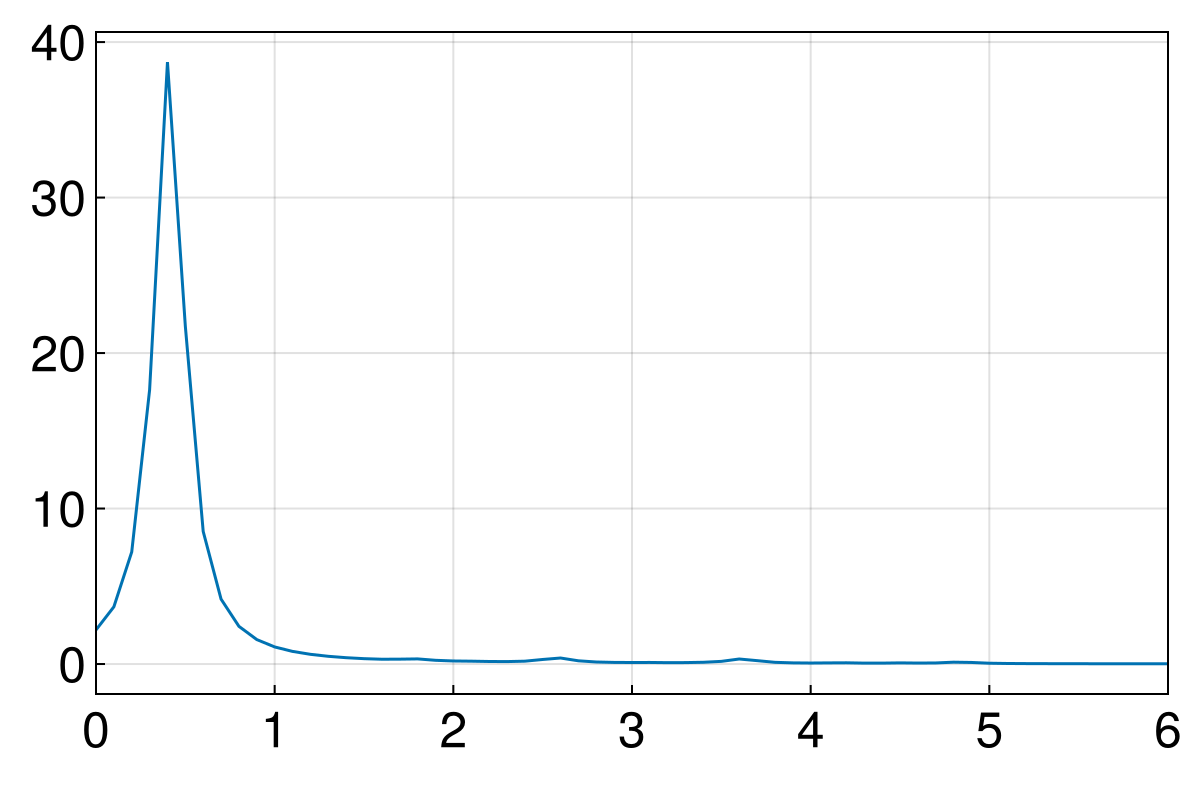

In [65]:
y, z = get_dsf_k(1.0; factor = 0.1, x_max = 8.0, b = "lor")
fig = Figure(fontsize = 25)
rowsize!(fig.layout, 1, Aspect(1, 0.618))
ax = Axis(fig[1, 1])
lines!(ax,y,z)
ax.xtickalign = 1
ax.ytickalign = 1
xlims!(ax, 0, 6)
resize_to_layout!(fig)
fig
# save("hb1_dsf_1.0pi.pdf", fig, pt_per_unit = 1)

In [22]:
fig = Figure(fontsize = 25)
rowsize!(fig.layout, 1, Aspect(1, 0.618))
ax = Axis(fig[1, 1])
for p = 0:0.05:1.0
    y = load("$(dir)/es200_$(p)pi.jld2", "Ek") |> real
    y = y/0.4104
    x = fill(p, size(y))
    scatter!(ax, x, y, marker = 'o', color = :black, markersize = 18)
end
ylims!(0, 12)
ax.xtickalign = 1
ax.ytickalign = 1
ax.yticks = 0:2:12
resize_to_layout!(fig)
fig
save("hb1_Ek.pdf", fig, pt_per_unit = 1)

CairoMakie.Screen{PDF}
